# Image Classification Capstone Project


In this project we are going to classify numbers from the dataset __MNIST__ by using
__Pytorch__ and __Keras__. And we are going to compare the both methods

### PYTORCH SCHEME

### Setup 

In [51]:
#conda install torchvision -c pytorch
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [52]:
# Define the function for plotting the channels
#Define the function plot_channels to plot out the kernel parameters of each channel
def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjust(hspace=0.1)
    out_index = 0
    in_index = 0
    
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
        if in_index > n_in-1:
            out_index = out_index + 1
            in_index = 0
        ax.imshow(W[out_index, in_index, :, :], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index = in_index + 1

    plt.show()

In [53]:
# Define the function for plotting the parameters
#Define the function plot_parameters to plot out the kernel parameters of each channel with Multiple outputs .

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()

In [54]:
#Define the function plot_activation to plot out the activations of the Convolutional layers
# Define the function for plotting the activations
def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()
    fig, axes = plt.subplots(number_rows, n_activations // number_rows)
    fig.subplots_adjust(hspace = 0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            # Set the label for the sub-plot.
            ax.set_xlabel("activation:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(A[i, :], vmin=A_min, vmax=A_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [55]:
#Define the function show_data to plot out data samples as images.
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE))


<h2 id="Makeup_Data">Get the Data</h2> 

In [56]:

#we create a transform to resize the image and convert it to a tensor .
IMAGE_SIZE = 16


composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [57]:
#Load the training dataset by setting the parameters train  to True. We use the transform defined above.

In [58]:

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)

In [59]:
#Load the testing dataset by setting the parameters train False.
# Make the validating 

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [60]:
# The label for the fourth data element

train_dataset[3][1]

1

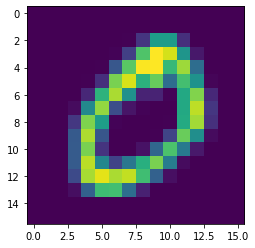

In [61]:
# The image for the second data element by using Pytorch
show_data(train_dataset[1])


## Convolutional Neural Network Class

Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.

In [62]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    # Outputs in each steps
    def activations(self, x):
        #outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

In [63]:
#There are 16 output channels for the first layer, and 32 output channels for the second layer
# Create the model object using CNN class

model = CNN(out_1=16, out_2=32)

In [64]:
# Plot the parameters
#plot_parameters(model.state_dict()['cnn1.weight'], number_rows=4, name="1st layer kernels before training ")
#plot_parameters(model.state_dict()['cnn2.weight'], number_rows=4, name='2nd layer kernels before training' )

In [66]:
#Define the loss function, the optimizer and the dataset loader
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [67]:
# Train the model
n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

## Analyze Results

Plot the loss and accuracy on the validation data:


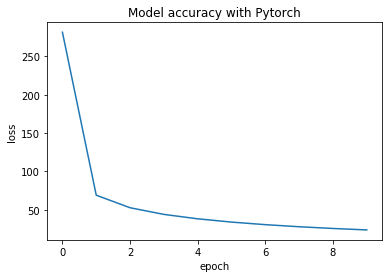

In [82]:
#Plot the loss and accuracy on the validation data:
# Plot the loss and accuracy
fig1, ax1 = plt.subplots()
plt.title('Model accuracy with Pytorch')
ax1.plot(cost_list)
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.tick_params(axis='y')
fig1.savefig("output1.png")

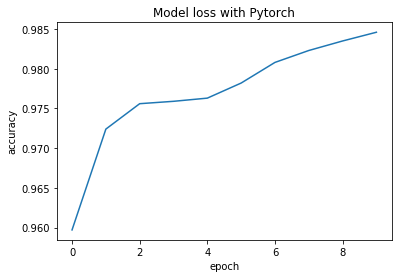

In [83]:
fig2, ax2 = plt.subplots() 
plt.title('Model loss with Pytorch') 
ax2.set_ylabel('accuracy') 
ax2.set_xlabel('epoch')
ax2.plot( accuracy_list)
ax2.tick_params(axis='y')
fig2.savefig("output2.png")

The accuracy is around 0.975 with 4 epochs

## KERAS SCHEME

In [137]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [138]:
import matplotlib.pyplot as plt

In [139]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [140]:
X_train.shape

(60000, 28, 28)

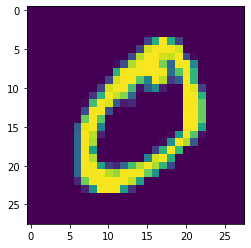

In [141]:
# The image for the second data element by using Keras
plt.imshow(X_train[1])

__Comments__: In Pytorch the data element are tensors in form of tuples
and in Keras are arrays

In [142]:
# In Keras
type(X_train[1])

numpy.ndarray

In [143]:
# In Pytorch
type(train_dataset[1])

tuple

In [144]:
#With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [145]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [146]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [147]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [148]:
##Build a Neural Network

In [149]:
# build the model
model = classification_model()

# fit the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
history_net = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.1842 - acc: 0.9442 - val_loss: 0.0920 - val_acc: 0.9706
Epoch 2/10
 - 6s - loss: 0.0795 - acc: 0.9751 - val_loss: 0.0741 - val_acc: 0.9775
Epoch 3/10
 - 6s - loss: 0.0538 - acc: 0.9827 - val_loss: 0.0834 - val_acc: 0.9742
Epoch 4/10
 - 6s - loss: 0.0392 - acc: 0.9874 - val_loss: 0.0769 - val_acc: 0.9772
Epoch 5/10
 - 6s - loss: 0.0319 - acc: 0.9893 - val_loss: 0.0692 - val_acc: 0.9795
Epoch 6/10
 - 6s - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0741 - val_acc: 0.9797
Epoch 7/10
 - 7s - loss: 0.0230 - acc: 0.9923 - val_loss: 0.0737 - val_acc: 0.9813
Epoch 8/10
 - 6s - loss: 0.0180 - acc: 0.9943 - val_loss: 0.0838 - val_acc: 0.9809
Epoch 9/10
 - 7s - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0866 - val_acc: 0.9804
Epoch 10/10
 - 6s - loss: 0.0165 - acc: 0.9951 - val_loss: 0.1020 - val_acc: 0.9790


In [150]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))     

Accuracy: 0.979% 
 Error: 0.02100000000000002


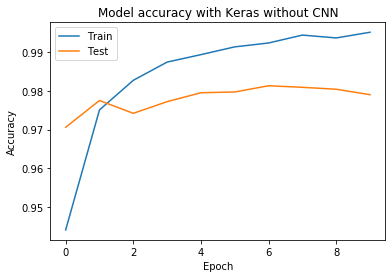

In [151]:
import matplotlib.pyplot as plt
fig3, ax3 = plt.subplots() 
plt.plot(history_net.history['acc'])
plt.plot(history_net.history['val_acc'])
plt.title('Model accuracy with Keras without CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig3.savefig("output3.png")

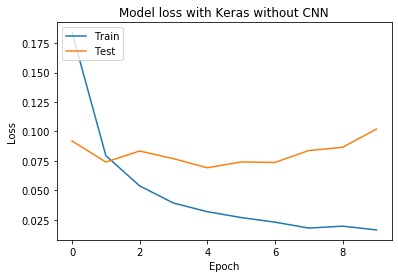

In [152]:
fig4, ax4 = plt.subplots() 
plt.plot(history_net.history['loss']) 
plt.plot(history_net.history['val_loss']) 
plt.title('Model loss with Keras without CNN') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
fig4.savefig("output4.png")

We perform the same calculation introducing the convolutional layers.

In [153]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

In [154]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [155]:
#Let's normalize the pixel values to be between 0 and 1
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [156]:

#Next, let's convert the target variable into binary categories
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

In [157]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [158]:
# build the model
model = convolutional_model()

# fit the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)



In [159]:
history_cnn =model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.3037 - acc: 0.9145 - val_loss: 0.1197 - val_acc: 0.9651
Epoch 2/10
 - 2s - loss: 0.0878 - acc: 0.9748 - val_loss: 0.0661 - val_acc: 0.9782
Epoch 3/10
 - 2s - loss: 0.0586 - acc: 0.9823 - val_loss: 0.0517 - val_acc: 0.9829
Epoch 4/10
 - 2s - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0432 - val_acc: 0.9850
Epoch 5/10
 - 2s - loss: 0.0349 - acc: 0.9895 - val_loss: 0.0367 - val_acc: 0.9880
Epoch 6/10
 - 2s - loss: 0.0293 - acc: 0.9913 - val_loss: 0.0336 - val_acc: 0.9894
Epoch 7/10
 - 2s - loss: 0.0249 - acc: 0.9923 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 8/10
 - 2s - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0467 - val_acc: 0.9855
Epoch 9/10
 - 2s - loss: 0.0174 - acc: 0.9950 - val_loss: 0.0403 - val_acc: 0.9867
Epoch 10/10
 - 2s - loss: 0.0150 - acc: 0.9956 - val_loss: 0.0403 - val_acc: 0.9869


In [160]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9869 
 Error: 1.3100000000000023


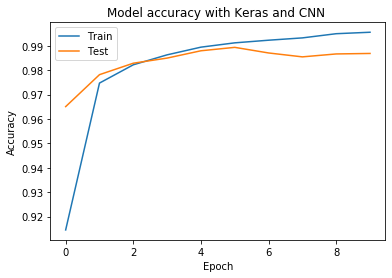

In [161]:
import matplotlib.pyplot as plt
fig5, ax5 = plt.subplots() 
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('Model accuracy with Keras and CNN ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig5.savefig("output5.png")

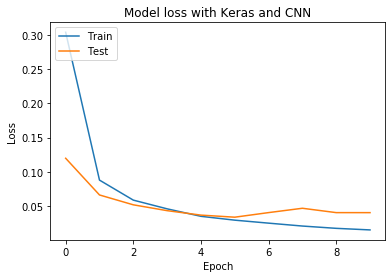

In [163]:
fig6, ax6 = plt.subplots() 
plt.plot(history_cnn.history['loss']) 
plt.plot(history_cnn.history['val_loss']) 
plt.title('Model loss with Keras and CNN') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
fig6.savefig("output6.png")